In [1]:
from packaging import version

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb

In [2]:
major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)

TensorBoard version:  2.12.1


In [3]:
experiment_id = "K3BoR0HETZiYzuqn4a0AnQ"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()
df

,run,tag,step,value
0,Feb05_18-13-57_DESKTOP-4P0HGA6,eval/rouge1,0,39.245071
1,Feb05_18-13-57_DESKTOP-4P0HGA6,eval/rouge1,1,39.873047
2,Feb05_18-13-57_DESKTOP-4P0HGA6,eval/rouge1,2,40.121464
3,Feb05_18-13-57_DESKTOP-4P0HGA6,eval/rouge1,3,39.189579
4,Feb05_18-13-57_DESKTOP-4P0HGA6,eval/rouge2,0,13.848315
...,...,...,...,...
937,Mar23_08-50-37_DESKTOP-4P0HGA6,train/loss,4,0.918290
938,Mar23_08-50-37_DESKTOP-4P0HGA6,train/loss,5,0.901242
939,Mar23_08-50-37_DESKTOP-4P0HGA6,train/loss,6,0.888882
940,Mar23_08-50-37_DESKTOP-4P0HGA6,train/loss,7,0.900678


In [4]:
print(df["run"].unique())
print(df["tag"].unique())

['Feb05_18-13-57_DESKTOP-4P0HGA6' 'Jan01_23-10-21_DESKTOP-4P0HGA6'
 'Jan01_23-27-44_DESKTOP-4P0HGA6' 'Jan07_23-24-00_DESKTOP-4P0HGA6'
 'Jan08_22-41-16_DESKTOP-4P0HGA6' 'Jan08_23-42-25_DESKTOP-4P0HGA6'
 'Jan09_00-33-37_DESKTOP-4P0HGA6' 'Jan09_00-40-04_DESKTOP-4P0HGA6'
 'Jan09_00-47-31_DESKTOP-4P0HGA6' 'Jan09_01-06-24_DESKTOP-4P0HGA6'
 'Jan12_22-15-23_DESKTOP-4P0HGA6' 'Jan12_22-19-04_DESKTOP-4P0HGA6'
 'Jan12_22-32-44_DESKTOP-4P0HGA6' 'Jan22_16-26-30_DESKTOP-4P0HGA6'
 'Jan22_20-52-53_DESKTOP-4P0HGA6' 'Jan23_20-21-12_DESKTOP-4P0HGA6'
 'Jan23_21-48-15_DESKTOP-4P0HGA6' 'Jan23_22-50-26_DESKTOP-4P0HGA6'
 'Jan26_22-25-13_DESKTOP-4P0HGA6' 'Jan26_23-34-10_DESKTOP-4P0HGA6'
 'Jan27_21-52-22_DESKTOP-4P0HGA6' 'Jan27_22-44-48_DESKTOP-4P0HGA6'
 'Jan29_10-57-55_DESKTOP-4P0HGA6' 'Jan29_15-13-42_DESKTOP-4P0HGA6'
 'Jan29_19-19-17_DESKTOP-4P0HGA6' 'Mar19_17-48-45_DESKTOP-4P0HGA6'
 'Mar19_23-13-26_DESKTOP-4P0HGA6' 'Mar20_10-19-37_DESKTOP-4P0HGA6'
 'Mar20_14-12-27_DESKTOP-4P0HGA6' 'Mar21_09-05-28_DESKTOP-4P0H

In [5]:
dfw = experiment.get_scalars() 
dfw


,run,tag,step,value
0,Feb05_18-13-57_DESKTOP-4P0HGA6,eval/rouge1,0,39.245071
1,Feb05_18-13-57_DESKTOP-4P0HGA6,eval/rouge1,1,39.873047
2,Feb05_18-13-57_DESKTOP-4P0HGA6,eval/rouge1,2,40.121464
3,Feb05_18-13-57_DESKTOP-4P0HGA6,eval/rouge1,3,39.189579
4,Feb05_18-13-57_DESKTOP-4P0HGA6,eval/rouge2,0,13.848315
...,...,...,...,...
937,Mar23_08-50-37_DESKTOP-4P0HGA6,train/loss,4,0.918290
938,Mar23_08-50-37_DESKTOP-4P0HGA6,train/loss,5,0.901242
939,Mar23_08-50-37_DESKTOP-4P0HGA6,train/loss,6,0.888882
940,Mar23_08-50-37_DESKTOP-4P0HGA6,train/loss,7,0.900678


In [9]:
dfw = dfw.rename(columns={'step': "Epoch", 'value' : 'Score'})

C:\Users\JustinDu\AppData\Local\Temp\ipykernel_44228\174523937.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfw_validation = dfw_validation[dfw.tag.str.match("eval/rouge2")]


Text(0.5, 1.0, 'eval/rouge2')

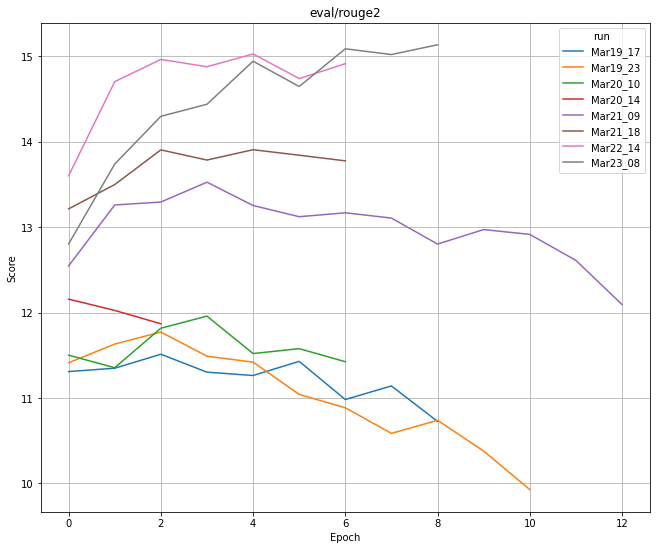

In [10]:
# Filter the DataFrame to only validation data, which is what the subsequent
# analyses and visualization will be focused on.
# Get the optimizer value for each row of the validation DataFrame.
dfw_validation = dfw[dfw.run.str.startswith("Mar")]
dfw_validation = dfw_validation[dfw.tag.str.match("eval/rouge2")]
optimizer_validation = dfw.run.apply(lambda run: run.split("-")[0])
optimizer_validation = optimizer_validation[dfw.run.str.startswith("Mar")]

plt.figure(figsize=(24, 9))
plt.subplot(1, 2, 1)
plt.grid()
sns.lineplot(data=dfw_validation, x="Epoch", y="Score",hue=optimizer_validation).set_title("eval/rouge2")

C:\Users\JustinDu\AppData\Local\Temp\ipykernel_44228\3496206879.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfw_validation = dfw_validation[dfw.tag.str.match("train/loss")]


Text(0.5, 1.0, 'train/loss')

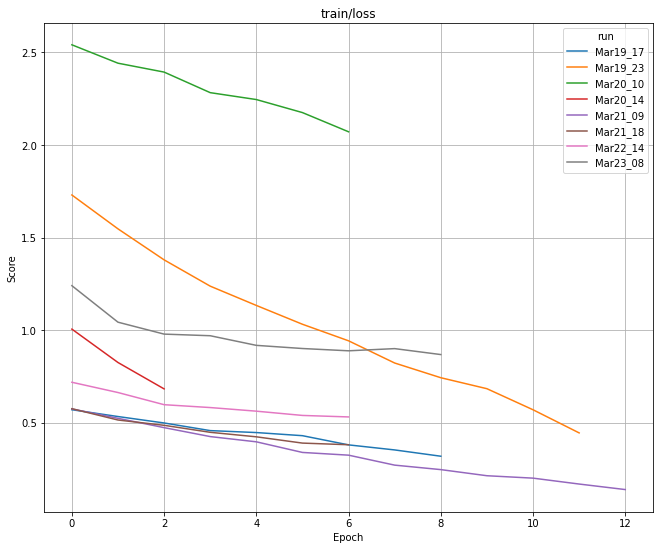

In [11]:
# Filter the DataFrame to only validation data, which is what the subsequent
# analyses and visualization will be focused on.
# Get the optimizer value for each row of the validation DataFrame.
dfw_validation = dfw[dfw.run.str.startswith("Mar")]
dfw_validation = dfw_validation[dfw.tag.str.match("train/loss")]
optimizer_validation = dfw.run.apply(lambda run: run.split("-")[0])
optimizer_validation = optimizer_validation[dfw.run.str.startswith("Mar")]

plt.figure(figsize=(24, 9))
plt.subplot(1, 2, 1)
plt.grid()
sns.lineplot(data=dfw_validation, x="Epoch", y="Score",hue=optimizer_validation).set_title("train/loss")

In [ ]:
def draw_boxes(image, bounds, color,width=5):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        draw.line([
            bound.vertices[0].x, bound.vertices[0].y,
            bound.vertices[1].x, bound.vertices[1].y,
            bound.vertices[2].x, bound.vertices[2].y,
            bound.vertices[3].x, bound.vertices[3].y,
            bound.vertices[0].x, bound.vertices[0].y],fill=color, width=width)
    return image
def get_document_bounds(response, feature):
    for i,page in enumerate(document.pages):
        for block in page.blocks:
            if feature==FeatureType.BLOCK:
                bounds.append(block.bounding_box)
            for paragraph in block.paragraphs:
                if feature==FeatureType.PARA:
                    bounds.append(paragraph.bounding_box)
                for word in paragraph.words:
                    for symbol in word.symbols:
                        if (feature == FeatureType.SYMBOL):
                            bounds.append(symbol.bounding_box)
                    if (feature == FeatureType.WORD):
                        bounds.append(word.bounding_box)
    return bounds
bounds=get_document_bounds(response, FeatureType.WORD)
draw_boxes(image,bounds, 'yellow')